In [1]:
from uproot_io import Events, View
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
titlesize = 20
labelsize = 14

In [2]:
#events = Events(r"C:\Users\andre\Desktop\Physics Project\bigdata\PandoraRecoFile_1.root")

In [3]:
TIT = np.load("TIT.npy")
TIS = np.load("TIS.npy")
SIS = np.load("SIS.npy")
SIT = np.load("SIT.npy")
trkleng = np.load("trkleng.npy")
shwleng = np.load("shwleng.npy")
trkpart = np.load("trkpart.npy")
shwpart = np.load("shwpart.npy")

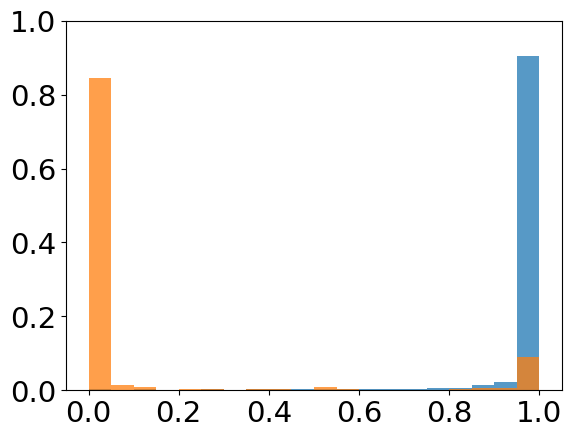

In [4]:
bin_edges = np.arange(0, 1.05, 0.05)

# hist1, _ = np.histogram(SIS, bins=bin_edges)
# hist2, _ = np.histogram(TIS, bins=bin_edges)
   
# hist1_normalized = hist1 / len(SIS)
# hist2_normalized = hist2 / len(TIS)

# plt.bar(bin_edges[:-1], hist2_normalized, width=0.05, align='edge', alpha=0.75, label='Tracks')
# plt.bar(bin_edges[:-1], hist1_normalized, width=0.05, align='edge', alpha=0.75, label='Showers')
# plt.title('Projective Likelihood (of being a Shower) Distribution')
# plt.xlabel('Likelihood of being a Shower')
# plt.legend(loc='upper center')
# plt.show()

hist2, _ = np.histogram(TIT, bins=bin_edges)
hist1, _ = np.histogram(SIT, bins=bin_edges)

hist2_normalized = hist2 / len(TIT)
hist1_normalized = hist1 / len(SIT)

plt.bar(bin_edges[:-1], hist2_normalized, width=0.05, align='edge', alpha=0.75, label='Tracks')
plt.bar(bin_edges[:-1], hist1_normalized, width=0.05, align='edge', alpha=0.75, label='Showers')
#plt.title('Projective Likelihood (of being a Track) Distribution')
#plt.xlabel('Likelihood of being a Track', fontsize=25)
plt.xticks(fontsize = 21)
plt.yticks(fontsize = 21)
plt.ylim(0,1)
#plt.legend(loc='upper center', fontsize=20)
plt.show()

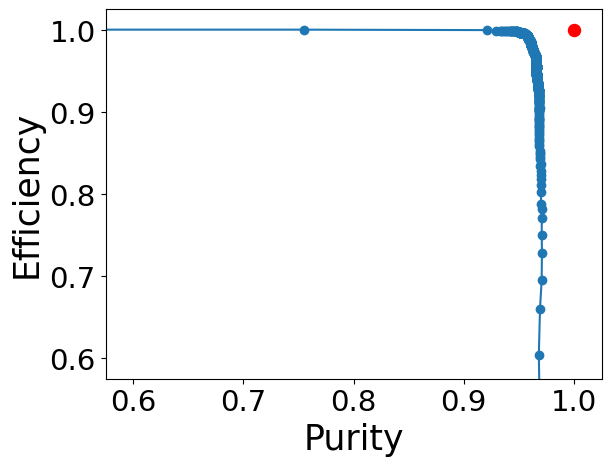

Best cut: 0.28300000000000003
At distance: 0.0418845584536896
With AUC: 0.9756086976908104


In [6]:
cuts = np.arange(0, 1, 0.001)
efficiency = []
purity = []

purity.append(0)
efficiency.append(1)

for i in cuts:
    goodtrk = []
    badtrk = []
    goodshw = []
    badshw = []
    for n in TIT:
        if n >= i:
            goodtrk.append(n)
        else:
            badtrk.append(n)
    for k in SIT:
        if k >= i:
            badshw.append(k)
        else:
            goodshw.append(k)

    eff = len(goodtrk)/(len(TIT))
    pur = len(goodtrk)/(len(goodtrk)+len(badshw))

    efficiency.append(eff)
    purity.append(pur)

purity.append(1)
efficiency.append(0)

plt.scatter(purity, efficiency)
plt.plot(purity, efficiency)
plt.scatter(1, 1, s=75, c='r')
plt.xlim(0.6,1.025)
plt.ylim(0.6,1.025)
plt.xlabel('Purity', fontsize=25)
plt.ylabel('Efficiency', fontsize=25)
#plt.title('ROC Curve for Track Likelihood')
plt.xticks(np.arange(0.6, 1.1, step=0.1), fontsize = 21)
plt.yticks(np.arange(0.6, 1.1, step=0.1), fontsize = 21)
plt.xlim(0.575,1.025)
plt.ylim(0.575,1.025)
plt.show()

np.save("PE_Likelihood", efficiency)
np.save("PP_Likelihood", purity)

area = np.trapz(efficiency, x=purity)

point = np.array([1, 1])
data_points = np.column_stack((purity, efficiency))
distances = np.linalg.norm(data_points - point, axis=1)
closest_index = np.argmin(distances)
closest_point = data_points[closest_index]
dist = distances[closest_index]
cutpoint = cuts[closest_index]

print('Best cut:', cutpoint)
print('At distance:', dist)
print('With AUC:', area)

#efficiency (true tracks as tracks/total true tracks)
#purity (true tracks as tracks/number we have called tracks)

In [6]:
TTAT = []
TTAS = []
TSAT = []
TSAS = []

leng1 = []
leng2 = []
leng3 = []
leng4 = []

part1 = []
part2 = []
part3 = []
part4 = []

for i, n in enumerate(TIT):
    if n >= cutpoint:
        TTAT.append(n)
        leng1.append(trkleng[i])
        part1.append(trkpart[i])
    if n < cutpoint:
        TTAS.append(n)
        leng2.append(trkleng[i])
        part2.append(trkpart[i])
        
for i, k in enumerate(SIT):
    if k >= cutpoint:
        TSAT.append(k)
        leng3.append(shwleng[i])
        part3.append(shwpart[i])
    if k < cutpoint:
        TSAS.append(k)
        leng4.append(shwleng[i])
        part4.append(shwpart[i])

TTATprob = len(TTAT)/(len(TTAT)+len(TTAS))
TTASprob = len(TTAS)/(len(TTAT)+len(TTAS))
TSATprob = len(TSAT)/(len(TSAT)+len(TSAS))
TSASprob = len(TSAS)/(len(TSAT)+len(TSAS))

confusion = np.array(([TTATprob, TTASprob],[TSATprob, TSASprob]))
print(confusion)

e1 = np.sqrt((TTATprob*(1-TTATprob))/len(TTAT))
e2 = np.sqrt((TTASprob*(1-TTASprob))/len(TTAS))
e3 = np.sqrt((TSATprob*(1-TSATprob))/len(TSAT))
e4 = np.sqrt((TSASprob*(1-TSASprob))/len(TSAS))

error = np.array(([e1, e2],[e3, e4]))
print(error)

[[0.98691385 0.01308615]
 [0.12615643 0.87384357]]
[[0.00188882 0.01640306]
 [0.02710978 0.01030063]]


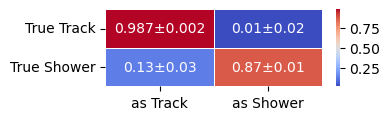

In [7]:
import seaborn as sns
variable_names1 = ['as Track', 'as Shower']
variable_names2 = ['True Track', 'True Shower']

annot_arr = np.array([['0.987±0.002','0.01±0.02'],
                      ['0.13±0.03','0.87±0.01']], dtype = str)

plt.figure(figsize = (3.5,1))
heatmap = sns.heatmap(confusion, annot=annot_arr, cmap='coolwarm', fmt="s", linewidths=.5, square=False)
heatmap.set_xticklabels(variable_names1, rotation=0)
heatmap.set_yticklabels(variable_names2, rotation=0)
#plt.title("Confusion Matrix")±±±±±
plt.show()

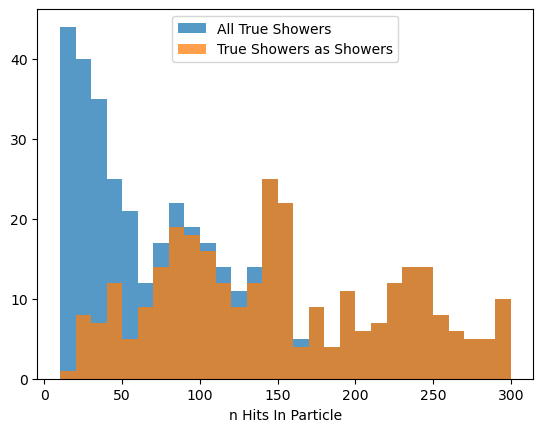

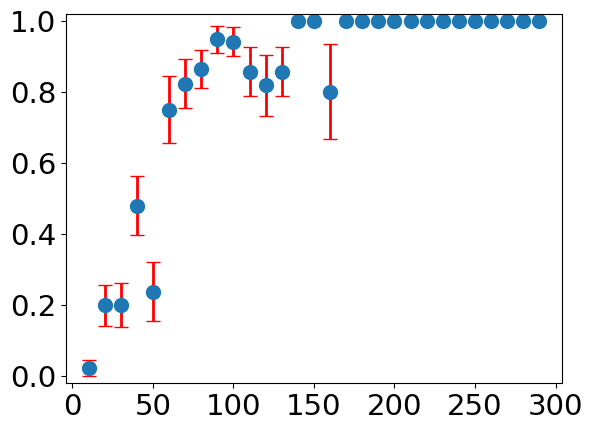

In [8]:
#print(max(trkleng))
#print(max(shwleng))
bin_edges = np.arange(10, 310, 10)

hist1, _ = np.histogram(shwleng, bins=bin_edges)
hist2, _ = np.histogram(leng4, bins=bin_edges)

#hist1_normalized = hist1 / len(trkleng)
#hist2_normalized = hist2 / len(leng1)

plt.bar(bin_edges[:-1], hist1, width=10, align='edge', alpha=0.75, label='All True Showers')
plt.bar(bin_edges[:-1], hist2, width=10, align='edge', alpha=0.75, label='True Showers as Showers')
#plt.title('')
plt.xlabel('n Hits In Particle')
plt.legend(loc='upper center')
plt.show()

xvalues = np.arange(10, 300, 10)
eff = hist2/hist1
error = []

for i, val in enumerate(eff):
    err = np.sqrt((val*(1-val))/(hist1[i]+hist2[i]))
    error.append(err)

#print(xvalues)
#print(eff)
#print(error)

plt.errorbar(xvalues, eff, yerr=error, fmt='o', elinewidth=2, ecolor='red', capsize=5, ms=10)
#plt.scatter(xvalues, (hist2/hist1))
#plt.xlabel('n Hits in Particle', fontsize=25)
#plt.ylabel('Efficiency', fontsize=25)
plt.xticks(fontsize = 21)
plt.yticks(fontsize = 21)
plt.ylim(-0.02,1.02)
plt.show()